# Data Mining Assignment 2_DT_NB

## Student Details

Student Name and ID of the member submitting the assignment: 

Student Name and ID of the remaining members: 

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!<br>
Do not make any changes in the dataset file and do not rename the 'database.csv'.
<br> Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>. 
<br> Do not to forget to cite any external sources used by you. 
**10 points per question will be deducted incase you fail to do so**
<br>**DO NOT DELETE THIS CELL**<br>
#### Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

## Programming Assignment Details (5 Points)


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load Gender_Classifier.csv .Output/prediction variable is 'gender' [1 points]

2) Create a dataframe and print the first and last seven records of your dataset.  [1 points]

3) Print the class labels. [1 points]

4) Split your dataset 60% for training, 20 for validation and 20% for testing the classifier. Use random state as 2022 [2 points]

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier #  To Import Decision Tree Classifier
from sklearn.model_selection import train_test_split #To Import train_test_split function
from sklearn import metrics # To Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix , classification_report #To Import classification matrix and report
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [165]:
#loading csv file
df_data = pd.read_csv('GenderClassifier.csv', encoding='latin1')
#printing first and last seven values of dat set
adf_data = df_data.head(7)
adf_data = adf_data.append(df_data.tail(7))
adf_data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/2015 23:24,male,1.0000,yes,1.0,12/5/2013 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/2015 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/2015 23:30,male,1.0000,yes,1.0,10/1/2012 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/2015 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/2015 23:33,male,0.6625,yes,1.0,11/28/2014 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/2015 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/2015 23:10,male,1.0000,yes,1.0,6/11/2009 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/2015 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/2015 1:15,female,1.0000,yes,1.0,4/16/2014 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/2015 12:40,6.590000e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/2015 1:47,female,1.0000,yes,1.0,3/11/2010 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/2015 12:40,6.590000e+17,New York Gritty,Central Time (US & Canada)
6,815719232,False,finalized,3,10/27/2015 1:57,brand,1.0000,yes,1.0,4/24/2008 13:03,...,https://pbs.twimg.com/profile_images/528547133...,0,0,@BpackEngineer Thank you for your patience whi...,NaN,13354,10/26/2015 12:40,6.590000e+17,Worldwide,Eastern Time (US & Canada)
20043,815756700,True,golden,240,NaN,male,1.0000,yes,1.0,9/27/2011 0:19,...,https://pbs.twimg.com/profile_images/378800000...,1,5ED4DC,"Game faggot and venison loin, crisp spelt and ...",NaN,8193,10/26/2015 13:19,6.590000e+17,Chertsey Bridge,NaN
20044,815756767,True,golden,227,NaN,female,1.0000,yes,1.0,6/11/2014 1:55,...,https://pbs.twimg.com/profile_images/643483977...,0,C0DEED,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,NaN,6669,10/26/2015 13:19,6.590000e+17,NaN,NaN
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/2015 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/2015 13:20,6.590000e+17,Verona ªÁ,NaN


In [146]:
# df_data['_last_judgment_at'] = pd.to_datetime(df_data['_last_judgment_at'], format = '%m/%d/%Y %H:%M' )

In [147]:
# df_data['created'] = pd.to_datetime(df_data['created'], format = '%m/%d/%Y %H:%M' )

In [209]:
#1. Load Gender_Classifier.csv .Output/prediction variable is 'gender'
pd.unique(df_data['gender'])

array(['male', 'female', 'brand', 'unknown', 'Other'], dtype=object)

In [153]:
# missing data
df_data.isnull().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                       0
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

In [154]:
df_data.isnull().any().sum()

8

In [155]:
df_data.dtypes

_unit_id                   int64
_golden                     bool
_unit_state               object
_trusted_judgments         int64
_last_judgment_at         object
gender                    object
gender:confidence        float64
profile_yn                object
profile_yn:confidence    float64
created                   object
description               object
fav_number                 int64
gender_gold               object
link_color                object
name                      object
profile_yn_gold           object
profileimage              object
retweet_count              int64
sidebar_color             object
text                      object
tweet_coord               object
tweet_count                int64
tweet_created             object
tweet_id                 float64
tweet_location            object
user_timezone             object
dtype: object

In [156]:
K = df_data
K

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/2015 23:24,male,1.0000,yes,1.0,12/5/2013 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/2015 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/2015 23:30,male,1.0000,yes,1.0,10/1/2012 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/2015 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/2015 23:33,male,0.6625,yes,1.0,11/28/2014 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/2015 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/2015 23:10,male,1.0000,yes,1.0,6/11/2009 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/2015 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/2015 1:15,female,1.0000,yes,1.0,4/16/2014 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/2015 12:40,6.590000e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/2015 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/2015 13:20,6.590000e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/2012 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/2015 12:40,6.590000e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/2012 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/2015 13:20,6.590000e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/2012 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/2015 12:40,6.590000e+17,Texas Hill Country,NaN


In [157]:
from sklearn.preprocessing import LabelEncoder
labelencoder_k = LabelEncoder()
labelencoder_k.fit_transform(K['gender'])
K['gender'] = labelencoder_k.fit_transform(K['gender'])
K['_golden'] = labelencoder_k.fit_transform(K['_golden'])
K['_unit_state'] = labelencoder_k.fit_transform(K['_unit_state'])
K['profile_yn'] = labelencoder_k.fit_transform(K['profile_yn'])
K['sidebar_color'] = labelencoder_k.fit_transform(K['sidebar_color'])
K['tweet_id'] = labelencoder_k.fit_transform(K['tweet_id'])
LAA = pd.DataFrame(K)

In [141]:
LAA.head(15)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,0,0,3,2015-10-26 23:24:00,3,1.0000,1,1.0,2013-12-05 01:48:00,...,https://pbs.twimg.com/profile_images/414342229...,0,560,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/2015 12:40,0,main; @Kan1shk3,Chennai
1,815719227,0,0,3,2015-10-26 23:30:00,3,1.0000,1,1.0,2012-10-01 13:51:00,...,https://pbs.twimg.com/profile_images/539604221...,0,366,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/2015 12:40,0,NaN,Eastern Time (US & Canada)
2,815719228,0,0,3,2015-10-26 23:33:00,3,0.6625,1,1.0,2014-11-28 11:30:00,...,https://pbs.twimg.com/profile_images/657330418...,1,366,i absolutely adore when louis starts the songs...,NaN,5617,10/26/2015 12:40,0,clcncl,Belgrade
3,815719229,0,0,3,2015-10-26 23:10:00,3,1.0000,1,1.0,2009-06-11 22:39:00,...,https://pbs.twimg.com/profile_images/259703936...,0,366,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/2015 12:40,0,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,0,0,3,2015-10-27 01:15:00,2,1.0000,1,1.0,2014-04-16 13:23:00,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/2015 12:40,0,NaN,NaN
5,815719231,0,0,3,2015-10-27 01:47:00,2,1.0000,1,1.0,2010-03-11 18:14:00,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/2015 12:40,0,New York Gritty,Central Time (US & Canada)
6,815719232,0,0,3,2015-10-27 01:57:00,1,1.0000,1,1.0,2008-04-24 13:03:00,...,https://pbs.twimg.com/profile_images/528547133...,0,0,@BpackEngineer Thank you for your patience whi...,NaN,13354,10/26/2015 12:40,0,Worldwide,Eastern Time (US & Canada)
7,815719233,0,0,3,2015-10-26 23:48:00,3,1.0000,1,1.0,2012-12-03 21:54:00,...,https://pbs.twimg.com/profile_images/508875440...,0,366,Gala Bingo clubs bought for å£241m: The UK's l...,NaN,112117,10/26/2015 12:40,0,NaN,NaN
8,815719234,0,0,3,2015-10-27 01:52:00,2,1.0000,1,1.0,2015-09-08 04:50:00,...,https://pbs.twimg.com/profile_images/658670112...,0,0,@_Aphmau_ the pic defines all mcd fangirls/fan...,NaN,482,10/26/2015 12:40,0,NaN,NaN
9,815719235,0,0,3,2015-10-27 01:49:00,2,1.0000,1,1.0,2011-05-13 03:32:00,...,https://pbs.twimg.com/profile_images/513327289...,0,560,@Evielady just how lovely is the tree this yea...,NaN,26085,10/26/2015 12:40,0,"Nottingham, England.",Amsterdam


In [166]:
#3. Print the class labels
print(df_data.columns.tolist())
# df_data['gender'].unique()

['_unit_id', '_golden', '_unit_state', '_trusted_judgments', '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn', 'profile_yn:confidence', 'created', 'description', 'fav_number', 'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage', 'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count', 'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone']


In [168]:
cols = df_data.columns.tolist()

x_colus = [i for i in cols if i!= 'gender']
x_data = df_data.loc[:,x_colus]
y_data = df_data.loc[:, ['gender']]

In [171]:
#4. Split your dataset 60% for training, 20 for validation and 20% for testing the classifier. Use random state as 2022
# X = df_data.drop(columns = ['gender']).copy()
# y = df_data['gender']

# # In the first step we will split the data in training and testing dataset
# X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state = 2022)

# # Now since we want the valid and test size to be equal (20% each of overall data). 
# # we have to define valid_size=0.5 (that is 50% of testing data)
# test_size = 0.5
# X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 2022)

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=2022)

X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=2022)
# print(X_train)
# print(X_train.shape), print(y_train.shape)
# print(X_valid.shape), print(y_valid.shape)
# print(X_test.shape), print(y_test.shape)

### DecisionTree (10 Points)
1) Use gini and entropy to measure the quality of a split. [2 points]

2) Use comments to explain your code and variable names. [1 point]

3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. Explain the confusion matrix and classification report in your own words). Do not copy from the internet.[4 points]

4) Print the decision tree visualization for 3 different depths using given libraries.  [3 points]

In [172]:
X_train_feat = X_train.loc[:,['_trusted_judgments', 'profile_yn:confidence', 'fav_number', 'retweet_count', 'tweet_count']]
X_valid_feat = X_valid.loc[:,['_trusted_judgments', 'profile_yn:confidence', 'fav_number', 'retweet_count', 'tweet_count']]
X_test_feat = X_test.loc[:,['_trusted_judgments', 'profile_yn:confidence', 'fav_number', 'retweet_count', 'tweet_count']]

In [178]:
# creation of decision tree and classifer and its fitting
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train_feat, y_train)

# predicting the data 
X_val_pred = clf.predict(X_valid_feat)

X_test_pred = clf.predict(X_test_feat)

print("Validation Accuracy", clf.score(X_valid_feat, y_valid))
print("Test Accuracy", clf.score(X_test_feat, y_test))



Validation Accuracy 0.46758104738154616
Test Accuracy 0.47780548628428926


[Text(167.4, 199.32, 'X[2] <= 27.5\ngini = 0.703\nsamples = 12030\nvalue = [55, 3670, 3889, 3733, 683]'),
 Text(83.7, 163.07999999999998, 'X[4] <= 31102.5\ngini = 0.596\nsamples = 3636\nvalue = [13, 2129, 548, 646, 300]'),
 Text(41.85, 126.83999999999999, 'X[2] <= 1.5\ngini = 0.674\nsamples = 1867\nvalue = [10, 845, 388, 510, 114]'),
 Text(20.925, 90.6, 'X[4] <= 97.5\ngini = 0.622\nsamples = 922\nvalue = [3, 502, 188, 178, 51]'),
 Text(10.4625, 54.359999999999985, 'X[4] <= 18.5\ngini = 0.719\nsamples = 173\nvalue = [1, 59, 35, 57, 21]'),
 Text(5.23125, 18.119999999999976, 'gini = 0.695\nsamples = 103\nvalue = [0, 32, 18, 42, 11]'),
 Text(15.693750000000001, 18.119999999999976, 'gini = 0.726\nsamples = 70\nvalue = [1, 27, 17, 15, 10]'),
 Text(31.387500000000003, 54.359999999999985, 'X[4] <= 4655.5\ngini = 0.581\nsamples = 749\nvalue = [2, 443, 153, 121, 30]'),
 Text(26.15625, 18.119999999999976, 'gini = 0.551\nsamples = 394\nvalue = [1, 247, 58, 71, 17]'),
 Text(36.61875, 18.11999999999

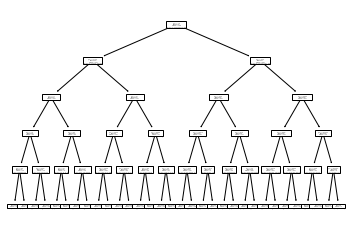

In [179]:
tree.plot_tree(clf)

In [191]:
from sklearn.metrics import classification_report

print(classification_report(y_test,X_test_pred))

print("Confusion Matrix: ",confusion_matrix(y_test, X_test_pred))

              precision    recall  f1-score   support

       Other       0.09      0.05      0.06        20
       brand       0.63      0.54      0.59      1142
      female       0.49      0.52      0.51      1428
        male       0.36      0.46      0.41      1198
     unknown       0.00      0.00      0.00       222

    accuracy                           0.48      4010
   macro avg       0.32      0.31      0.31      4010
weighted avg       0.47      0.48      0.47      4010

Confusion Matrix:  [[  1   2   8   9   0]
 [  0 621 167 354   0]
 [  2 149 742 535   0]
 [  6 131 509 552   0]
 [  2  77  74  69   0]]


C:\Users\hpash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hpash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hpash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [189]:
from sklearn.metrics import classification_report

print(classification_report(X_val_pred,X_test_pred))

              precision    recall  f1-score   support

       Other       0.00      0.00      0.00         0
       brand       0.29      0.25      0.27      1131
      female       0.42      0.37      0.40      1708
        male       0.28      0.36      0.32      1171

    accuracy                           0.33      4010
   macro avg       0.25      0.25      0.24      4010
weighted avg       0.34      0.33      0.34      4010



C:\Users\hpash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hpash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hpash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix


<AxesSubplot:>

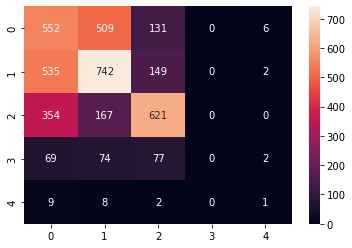

In [192]:
from sklearn.metrics import confusion_matrix

# prining the confustion matrix on the test data
con_data = confusion_matrix(y_test, X_test_pred, labels=['male', 'female', 'brand', 'unknown', 'Other'])
print("Confusion matrix")
import seaborn as sns

sns.heatmap(con_data, annot=True, fmt='d')

[Text(167.4, 190.26, 'X[2] <= 27.5\ngini = 0.703\nsamples = 12030\nvalue = [55, 3670, 3889, 3733, 683]'),
 Text(83.7, 135.9, 'X[4] <= 31102.5\ngini = 0.596\nsamples = 3636\nvalue = [13, 2129, 548, 646, 300]'),
 Text(41.85, 81.53999999999999, 'X[2] <= 1.5\ngini = 0.674\nsamples = 1867\nvalue = [10, 845, 388, 510, 114]'),
 Text(20.925, 27.180000000000007, 'gini = 0.622\nsamples = 922\nvalue = [3, 502, 188, 178, 51]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.696\nsamples = 945\nvalue = [7, 343, 200, 332, 63]'),
 Text(125.55000000000001, 81.53999999999999, 'X[2] <= 0.5\ngini = 0.448\nsamples = 1769\nvalue = [3, 1284, 160, 136, 186]'),
 Text(104.625, 27.180000000000007, 'gini = 0.4\nsamples = 1292\nvalue = [2, 982, 94, 54, 160]'),
 Text(146.475, 27.180000000000007, 'gini = 0.547\nsamples = 477\nvalue = [1, 302, 66, 82, 26]'),
 Text(251.10000000000002, 135.9, 'X[2] <= 959.5\ngini = 0.671\nsamples = 8394\nvalue = [42, 1541, 3341, 3087, 383]'),
 Text(209.25, 81.53999999999999, 

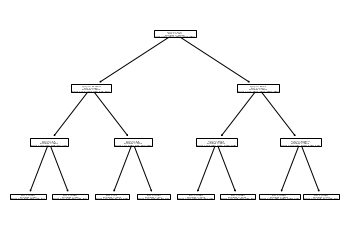

In [194]:
from sklearn.tree import export_graphviz
clf = DecisionTreeClassifier(max_depth = 3, criterion='gini')
clf.fit(X_train_feat, y_train)
clf.predict(X_test_feat)
tree.plot_tree(clf)

In [214]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
 # Creating the classifier object
clf = DecisionTreeClassifier (criterion="gini",max_depth=2)


In [216]:
clf.fit(X_train_feat, y_train)

DecisionTreeClassifier(max_depth=2)

In [218]:
y_pred = clf.predict(X_test_feat)

In [184]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.4743142144638404


In [219]:
from sklearn.metrics import classification_report
print("Report : ",classification_report(y_test, y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))

Report :                precision    recall  f1-score   support

       Other       0.00      0.00      0.00        20
       brand       0.58      0.59      0.58      1142
      female       0.48      0.55      0.51      1428
        male       0.37      0.37      0.37      1198
     unknown       0.00      0.00      0.00       222

    accuracy                           0.47      4010
   macro avg       0.28      0.30      0.29      4010
weighted avg       0.45      0.47      0.46      4010

Confusion Matrix:  [[  0   5   9   6   0]
 [  0 671 189 282   0]
 [  0 210 789 429   0]
 [  0 185 571 442   0]
 [  0  92  81  49   0]]


C:\Users\hpash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hpash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hpash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [195]:
clf1=DecisionTreeClassifier(criterion = "entropy",max_depth=4)
clf1.fit(X_train_feat, y_train)
y_pred=clf1.predict(X_test_feat)
X_val_pred= clf.predict(X_valid_feat)
score = accuracy_score(y_test, y_pred)
print(score)
print("Report : ",classification_report(y_test, y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))

0.4748129675810474
Report :                precision    recall  f1-score   support

       Other       0.22      0.10      0.14        20
       brand       0.58      0.59      0.58      1142
      female       0.48      0.55      0.52      1428
        male       0.37      0.37      0.37      1198
     unknown       0.00      0.00      0.00       222

    accuracy                           0.47      4010
   macro avg       0.33      0.32      0.32      4010
weighted avg       0.45      0.47      0.46      4010

Confusion Matrix:  [[  2   3   9   6   0]
 [  3 673 184 282   0]
 [  1 210 789 428   0]
 [  3 185 570 440   0]
 [  0  92  81  49   0]]


C:\Users\hpash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hpash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hpash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix


<AxesSubplot:>

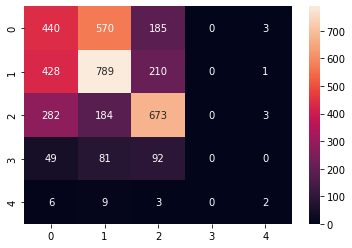

In [197]:
con_data = confusion_matrix(y_test, y_pred, labels=['male', 'female', 'brand', 'unknown', 'Other'])
print("Confusion matrix")
import seaborn as sns

sns.heatmap(con_data, annot=True, fmt='d')

[Text(167.4, 190.26, 'X[2] <= 27.5\nentropy = 1.844\nsamples = 12030\nvalue = [55, 3670, 3889, 3733, 683]'),
 Text(83.7, 135.9, 'X[4] <= 31102.5\nentropy = 1.633\nsamples = 3636\nvalue = [13, 2129, 548, 646, 300]'),
 Text(41.85, 81.53999999999999, 'X[2] <= 1.5\nentropy = 1.787\nsamples = 1867\nvalue = [10, 845, 388, 510, 114]'),
 Text(20.925, 27.180000000000007, 'entropy = 1.661\nsamples = 922\nvalue = [3, 502, 188, 178, 51]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 1.848\nsamples = 945\nvalue = [7, 343, 200, 332, 63]'),
 Text(125.55000000000001, 81.53999999999999, 'X[2] <= 0.5\nentropy = 1.291\nsamples = 1769\nvalue = [3, 1284, 160, 136, 186]'),
 Text(104.625, 27.180000000000007, 'entropy = 1.155\nsamples = 1292\nvalue = [2, 982, 94, 54, 160]'),
 Text(146.475, 27.180000000000007, 'entropy = 1.496\nsamples = 477\nvalue = [1, 302, 66, 82, 26]'),
 Text(251.10000000000002, 135.9, 'X[2] <= 959.5\nentropy = 1.75\nsamples = 8394\nvalue = [42, 1541, 3341, 3087, 383]'),
 Text

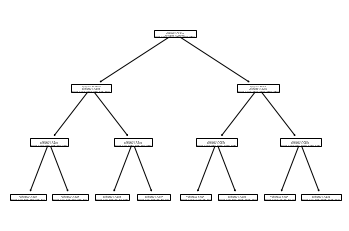

In [198]:
clf = DecisionTreeClassifier(max_depth = 3, criterion='entropy')
clf.fit(X_train_feat, y_train)
clf.predict(X_test_feat)
tree.plot_tree(clf)

Validation Accuracy 0.45935162094763093
Test Accuracy 0.47605985037406484
              precision    recall  f1-score   support

       Other       0.09      0.05      0.06        20
       brand       0.63      0.54      0.59      1142
      female       0.49      0.52      0.51      1428
        male       0.36      0.46      0.41      1198
     unknown       0.00      0.00      0.00       222

    accuracy                           0.48      4010
   macro avg       0.32      0.31      0.31      4010
weighted avg       0.47      0.48      0.47      4010



C:\Users\hpash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hpash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hpash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(175.28478260869565, 205.35999999999999, 'X[2] <= 27.5\ngini = 0.703\nsamples = 12030\nvalue = [55, 3670, 3889, 3733, 683]'),
 Text(95.37554347826087, 181.2, 'X[4] <= 31102.5\ngini = 0.596\nsamples = 3636\nvalue = [13, 2129, 548, 646, 300]'),
 Text(49.18891304347826, 157.04, 'X[2] <= 1.5\ngini = 0.674\nsamples = 1867\nvalue = [10, 845, 388, 510, 114]'),
 Text(23.89695652173913, 132.88, 'X[4] <= 97.5\ngini = 0.622\nsamples = 922\nvalue = [3, 502, 188, 178, 51]'),
 Text(10.917391304347825, 108.72, 'X[4] <= 18.5\ngini = 0.719\nsamples = 173\nvalue = [1, 59, 35, 57, 21]'),
 Text(4.852173913043478, 84.56, 'X[4] <= 10.5\ngini = 0.695\nsamples = 103\nvalue = [0, 32, 18, 42, 11]'),
 Text(2.911304347826087, 60.400000000000006, 'X[3] <= 0.5\ngini = 0.683\nsamples = 78\nvalue = [0, 30, 11, 29, 8]'),
 Text(1.9408695652173913, 36.24000000000001, 'X[4] <= 8.5\ngini = 0.679\nsamples = 77\nvalue = [0, 30, 10, 29, 8]'),
 Text(0.9704347826086956, 12.079999999999984, 'gini = 0.663\nsamples = 68\nval

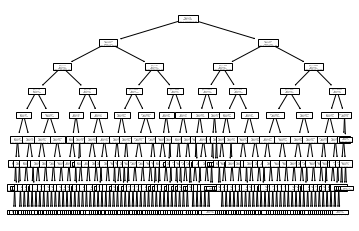

In [202]:
# importing the classifier and fitting the training data.
clf = DecisionTreeClassifier(max_depth=8)
clf.fit(X_train_feat, y_train)

# predicing the data based on the validation data split
val_pred = clf.predict(X_valid_feat)

# predicing the data based in the testing data split
test_pred = clf.predict(X_test_feat)

print("Validation Accuracy", clf.score(X_valid_feat, y_valid))
print("Test Accuracy", clf.score(X_test_feat, y_test))

# classification report on the testing data.
print(classification_report(y_test, X_test_pred))
tree.plot_tree(clf)

# Naive Bayes (10 Points)

1) Use all types of Naive bayes classifier present in the sklearn to predict the test data. If you are not able to implement any of the classifier explain in detail why it can't be done.[5 point] 

2) Use comments to explain your code and variable names[1 point]

3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support)for all the NB Classifier. show the best classifier. Explain the classification report in your own words. Do not copy from the internet. [4 points]

In [ ]:
#Gaussian Naive Bayes

In [203]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_feat, y_train)

y_pred_valid = gnb.predict(X_valid_feat)

y_pred_test = gnb.predict(X_test_feat)

print("-"*20, "Test Accuracy", "-"*20)
print("Confusion Matrix: \n")
print(confusion_matrix(y_test, y_pred_test, labels=['male', 'female', 'brand', 'unknown', 'Other']))
print("Classification Report: \n")
print(classification_report(y_test, y_pred_test))

print("-"*20, "Val Accuracy", "-"*20)

print("Confusion Matrix: \n")
print(confusion_matrix(y_valid, y_pred_valid, labels=['male', 'female', 'brand', 'unknown', 'Other']))
print("Classification Report: \n")
print(classification_report(y_valid, y_pred_valid))

C:\Users\hpash\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-------------------- Test Accuracy --------------------
Confusion Matrix: 

[[   9 1093   50   30   16]
 [   3 1346   32   24   23]
 [   5 1012   81   32   12]
 [   0  208    7    4    3]
 [   0   18    1    0    1]]
Classification Report: 

              precision    recall  f1-score   support

       Other       0.02      0.05      0.03        20
       brand       0.47      0.07      0.12      1142
      female       0.37      0.94      0.53      1428
        male       0.53      0.01      0.01      1198
     unknown       0.04      0.02      0.03       222

    accuracy                           0.36      4010
   macro avg       0.29      0.22      0.14      4010
weighted avg       0.43      0.36      0.23      4010

-------------------- Val Accuracy --------------------
Confusion Matrix: 

[[   8 1157   46   30   22]
 [   9 1288   31   29   26]
 [   2 1007   74   39    8]
 [   0  196    6    6    4]
 [   0   21    1    0    0]]
Classification Report: 

              precision    r

In [ ]:
#Multinomial Naive Bayes

In [205]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(stop_words='english')

ft_vec = vector.fit(X_train['text'])

x_train_txt = ft_vec.transform(X_train['text'])

x_test_txt = ft_vec.transform(X_test['text'])

x_val_txt = ft_vec.transform(X_valid['text'])

mnb = MultinomialNB()

mnb.fit(x_train_txt,y_train)

y_pred_val = mnb.predict(x_val_txt)

y_pred_test = mnb.predict(x_test_txt)

print("-"*20, "Test Accuracy", "-"*20)
print("Confusion Matrix: \n")
print(confusion_matrix(y_test, y_pred_test, labels=['male', 'female', 'brand', 'unknown', 'Other']))
print("Classification Report: \n")
print(classification_report(y_test, y_pred_test))

print("-"*20, "Val Accuracy", "-"*20)

print("Confusion Matrix: \n")
print(confusion_matrix(y_valid, y_pred_val, labels=['male', 'female', 'brand', 'unknown', 'Other']))
print("Classification Report: \n")
print(classification_report(y_valid, y_pred_val))

C:\Users\hpash\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hpash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hpash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hpash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Pre

-------------------- Test Accuracy --------------------
Confusion Matrix: 

[[498 510 186   4   0]
 [378 871 178   1   0]
 [247 229 665   1   0]
 [ 66  85  70   1   0]
 [  4  11   4   1   0]]
Classification Report: 

              precision    recall  f1-score   support

       Other       0.00      0.00      0.00        20
       brand       0.60      0.58      0.59      1142
      female       0.51      0.61      0.56      1428
        male       0.42      0.42      0.42      1198
     unknown       0.12      0.00      0.01       222

    accuracy                           0.51      4010
   macro avg       0.33      0.32      0.31      4010
weighted avg       0.49      0.51      0.49      4010

-------------------- Val Accuracy --------------------
Confusion Matrix: 

[[547 522 193   1   0]
 [329 902 151   1   0]
 [249 243 637   1   0]
 [ 65  79  68   0   0]
 [  7  11   2   2   0]]
Classification Report: 

              precision    recall  f1-score   support

       Other       0.00

In [ ]:
#Complement Naive Bayes

In [206]:
from sklearn.naive_bayes import ComplementNB
mnb = ComplementNB()

mnb.fit(x_train_txt,y_train)

y_pred_val = mnb.predict(x_val_txt)

y_pred_test = mnb.predict(x_test_txt)

print("-"*20, "Test Accuracy", "-"*20)
print("Confusion Matrix: \n")
print(confusion_matrix(y_test, y_pred_test, labels=['male', 'female', 'brand', 'unknown', 'Other']))
print("Classification Report: \n")
print(classification_report(y_test, y_pred_test))

print("-"*20, "Val Accuracy", "-"*20)

print("Confusion Matrix: \n")
print(confusion_matrix(y_valid, y_pred_val, labels=['male', 'female', 'brand', 'unknown', 'Other']))
print("Classification Report: \n")
print(classification_report(y_valid, y_pred_val))

C:\Users\hpash\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-------------------- Test Accuracy --------------------
Confusion Matrix: 

[[438 503 226  25   6]
 [352 848 205  17   6]
 [225 219 690   6   2]
 [ 60  87  69   6   0]
 [  4  11   3   2   0]]
Classification Report: 

              precision    recall  f1-score   support

       Other       0.00      0.00      0.00        20
       brand       0.58      0.60      0.59      1142
      female       0.51      0.59      0.55      1428
        male       0.41      0.37      0.38      1198
     unknown       0.11      0.03      0.04       222

    accuracy                           0.49      4010
   macro avg       0.32      0.32      0.31      4010
weighted avg       0.47      0.49      0.48      4010

-------------------- Val Accuracy --------------------
Confusion Matrix: 

[[504 506 228  19   6]
 [297 887 178  17   4]
 [226 238 646  19   1]
 [ 64  71  72   4   1]
 [  6  10   2   3   1]]
Classification Report: 

              precision    recall  f1-score   support

       Other       0.08

In [ ]:
#Bernoulli Naive Bayes

In [208]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

bnb.fit(x_train_txt,y_train)

y_pred_val = bnb.predict(x_val_txt)

y_pred_test = bnb.predict(x_test_txt)

print("-"*20, "Test Accuracy", "-"*20)
print("Confusion Matrix: \n")
print(confusion_matrix(y_test, y_pred_test, labels=['male', 'female', 'brand', 'unknown', 'Other']))
print("Classification Report: \n")
print(classification_report(y_test, y_pred_test))

print("-"*20, "Val Accuracy", "-"*20)

print("Confusion Matrix: \n")
print(confusion_matrix(y_valid, y_pred_val, labels=['male', 'female', 'brand', 'unknown', 'Other']))
print("Classification Report: \n")
print(classification_report(y_valid, y_pred_val))

C:\Users\hpash\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hpash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hpash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hpash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Pre

-------------------- Test Accuracy --------------------
Confusion Matrix: 

[[ 413  672  113    0    0]
 [ 268 1053  107    0    0]
 [ 233  324  585    0    0]
 [  49  118   55    0    0]
 [   2   16    2    0    0]]
Classification Report: 

              precision    recall  f1-score   support

       Other       0.00      0.00      0.00        20
       brand       0.68      0.51      0.58      1142
      female       0.48      0.74      0.58      1428
        male       0.43      0.34      0.38      1198
     unknown       0.00      0.00      0.00       222

    accuracy                           0.51      4010
   macro avg       0.32      0.32      0.31      4010
weighted avg       0.49      0.51      0.49      4010

-------------------- Val Accuracy --------------------
Confusion Matrix: 

[[ 452  681  130    0    0]
 [ 240 1053   90    0    0]
 [ 238  346  546    0    0]
 [  61  100   51    0    0]
 [   6   14    2    0    0]]
Classification Report: 

              precision    r

C:\Users\hpash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hpash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Report (23 Points)


1) Describe the Decision Tree methods, and Naive Bayes classifier in details in your own words. Dont copy paste it from the internet. Write it on your own.  [5 points]

2) Describe the datasets like what do you understand from the dataset? and if you have done any pre-processing , and your code, please write down your observation. [6 points]

4) Visualization of the decision tree for gini and entropy.[4 points]

5) Interpret your results, compare gini and entropy [4 points]

6) Visualize the dataset, for the target variable - 2 graphs [4 points]

Do not to forget to cite your sources!

In [ ]:
External Sources:

https://towardsdatascience.com/using-machine-learning-to-predict-home-prices-d5d534e42d38

https://machinelearningmastery.com/types-of-classification-in-machine-learning/
    
https://www.bogotobogo.com/python/scikit-learn/scikt_machine_learning_Decision_Tree_Learning_Informatioin_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php

https://towardsdatascience.com/labeling-data-with-pandas-9e573ce59c42

https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Constructing_Decision_Tree_Learning_Information_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php
